<a href="https://colab.research.google.com/github/Tushar-20/Onion-Price-Prediction-System/blob/main/onion_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/Onion-Prices-2020.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,state,district,market,variety,arrival_date,min_price,max_price,modal_price
0,Andhra Pradesh,Kurnool,Kurnool,Local,3/1/2020,1350,4390,3100.0
1,Andhra Pradesh,Kurnool,Kurnool,Local,4/1/2020,1390,4400,3200.0
2,Andhra Pradesh,Kurnool,Kurnool,Local,6/1/2020,1460,5150,4310.0
3,Andhra Pradesh,Kurnool,Kurnool,Local,7/1/2020,2010,5200,4200.0
4,Andhra Pradesh,Kurnool,Kurnool,Local,10/1/2020,1320,4050,3300.0


In [ ]:
data['arrival_date'] = pd.to_datetime(data['arrival_date'], dayfirst=True)
data['arrival_month'] = data['arrival_date'].dt.month
data['arrival_day'] = data['arrival_date'].dt.day

In [ ]:
data.drop('arrival_date', axis=1, inplace=True)

In [ ]:
data.head()

,state,district,market,variety,min_price,max_price,modal_price,arrival_month,arrival_day
0,Andhra Pradesh,Kurnool,Kurnool,Local,1350,4390,3100.0,1,3
1,Andhra Pradesh,Kurnool,Kurnool,Local,1390,4400,3200.0,1,4
2,Andhra Pradesh,Kurnool,Kurnool,Local,1460,5150,4310.0,1,6
3,Andhra Pradesh,Kurnool,Kurnool,Local,2010,5200,4200.0,1,7
4,Andhra Pradesh,Kurnool,Kurnool,Local,1320,4050,3300.0,1,10


In [ ]:
label_encoders = {}
for column in ['state', 'district', 'market', 'variety']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [ ]:
data.head()

,state,district,market,variety,min_price,max_price,modal_price,arrival_month,arrival_day
0,0,178,486,9,1350,4390,3100.0,1,3
1,0,178,486,9,1390,4400,3200.0,1,4
2,0,178,486,9,1460,5150,4310.0,1,6
3,0,178,486,9,2010,5200,4200.0,1,7
4,0,178,486,9,1320,4050,3300.0,1,10


In [ ]:
features = data.drop('modal_price', axis=1)
target = data['modal_price']
features.head()


,state,district,market,variety,min_price,max_price,arrival_month,arrival_day
0,0,178,486,9,1350,4390,1,3
1,0,178,486,9,1390,4400,1,4
2,0,178,486,9,1460,5150,1,6
3,0,178,486,9,2010,5200,1,7
4,0,178,486,9,1320,4050,1,10


In [ ]:
target.head()

0    3100.0
1    3200.0
2    4310.0
3    4200.0
4    3300.0
Name: modal_price, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train

,state,district,market,variety,min_price,max_price,arrival_month,arrival_day
36503,14,26,357,13,2300,2500,2,25
77254,19,107,205,17,1100,1200,7,27
79643,19,116,126,17,970,1000,5,24
34683,11,244,679,9,800,2700,9,10
81949,19,137,469,17,950,1150,5,24
...,...,...,...,...,...,...,...,...
54886,16,44,110,12,900,900,6,4
76820,19,102,862,17,950,1050,6,22
103694,21,140,19,13,1400,1600,7,23
860,2,228,540,12,3000,7000,1,2


In [ ]:
X_test

,state,district,market,variety,min_price,max_price,arrival_month,arrival_day
17617,8,247,698,12,400,850,7,28
53220,15,267,520,13,2300,2600,2,10
56930,16,117,832,0,600,800,5,12
89497,19,198,471,17,1300,1400,9,2
47849,15,127,841,13,4200,4600,2,3
...,...,...,...,...,...,...,...,...
32756,11,219,591,17,2000,2400,2,18
58567,16,283,1,13,1475,1525,4,18
43434,15,13,28,12,700,2200,3,21
4964,4,94,257,13,800,1100,6,15


In [ ]:
y_train

36503     2400.0
77254     1145.0
79643     1000.0
34683     1750.0
81949     1050.0
           ...  
54886      900.0
76820     1000.0
103694    1500.0
860       5000.0
15795     1250.0
Name: modal_price, Length: 85836, dtype: float64

In [ ]:
y_test

17617     670.0
53220    2500.0
56930     650.0
89497    1365.0
47849    4400.0
          ...  
32756    2300.0
58567    1500.0
43434    1500.0
4964      950.0
47233    1000.0
Name: modal_price, Length: 21459, dtype: float64

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "K-NN Regressor": KNeighborsRegressor(),
}

metrics = {}

for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        metrics[name] = (mse, r2)
        print(f"{name} - MSE: {mse}, R2: {r2}, Accuracy: {r2}")


Linear Regression - MSE: 25265.90381074321, R2: 0.9885003898977609, Accuracy: 0.9885003898977609
K-NN Regressor - MSE: 12987.866668754368, R2: 0.994088657826401, Accuracy: 0.994088657826401


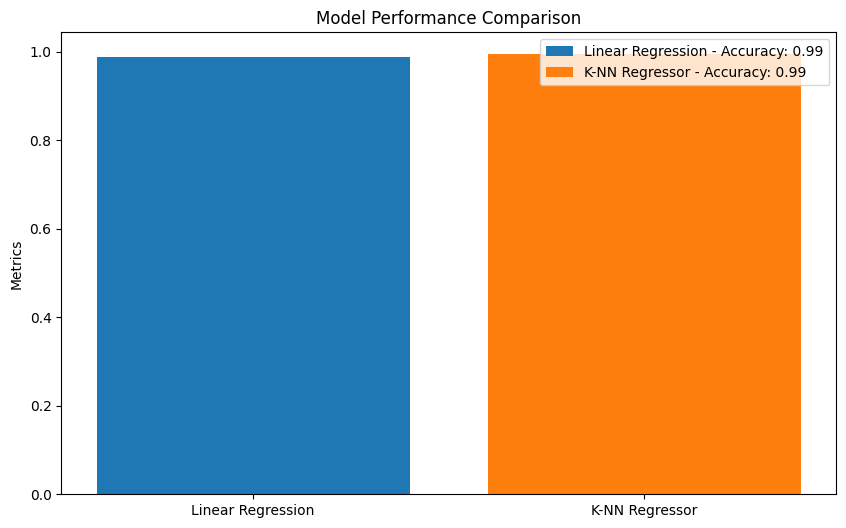

In [ ]:
plt.figure(figsize=(10, 6))
for name, metric in metrics.items():
    if name in ["Linear Regression", "K-NN Regressor"]:
        plt.bar(name, metric[1], label=f"{name} - Accuracy: {metric[1]:.2f}")

plt.ylabel("Metrics")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()

